In [99]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [100]:
data = pd.read_csv('rfm_traintest.csv')
seasonal = pd.read_csv('seasonal_predictions.csv')
demo = pd.read_csv('donor_demographics.csv')
merged = data.merge(seasonal,how ='inner', on = 'donor_num')
merged['Freq_am'] = merged['Frequency']/merged['ActiveMonths']

In [101]:
merged

,donor_num,2011,2012,2013,2014,2015,2016,2017,Recency,Frequency,...,StdDiff,First2LastRange,FreqRangeRatio,DonatedAgain,Num2018Donations,DaysBefore2018Don,SummerActivity,WinterActivity,SeasonalActivity,Freq_am
0,1,0,0,0,0,0,12,74,1,86,...,4.233942,406,0.211823,1,10,9.0,0.127907,0.465116,0.593023,6.142857
1,2,83,21,0,0,0,0,0,2106,104,...,3.166747,446,0.233184,0,0,NaN,0.221154,0.336538,0.557692,6.933333
2,4,0,0,0,0,0,0,64,2,64,...,7.759770,306,0.209150,1,26,2.0,0.359375,0.390625,0.750000,6.400000
3,5,5,11,0,0,0,0,0,1899,16,...,46.838730,505,0.031683,0,0,NaN,0.562500,0.312500,0.875000,2.285714
4,6,14,27,0,0,29,0,0,828,70,...,137.224737,1439,0.048645,0,0,NaN,0.200000,0.314286,0.514286,6.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238460,2276117,0,0,0,0,0,0,1,0,1,...,0.000000,1,1.000000,1,2,3.0,0.000000,1.000000,1.000000,1.000000
2238461,2276118,0,0,0,0,0,0,1,0,1,...,0.000000,1,1.000000,1,11,4.0,0.000000,1.000000,1.000000,1.000000
2238462,2276119,0,0,0,0,0,0,1,0,1,...,0.000000,1,1.000000,1,2,7.0,0.000000,1.000000,1.000000,1.000000
2238463,2276121,0,0,0,0,0,0,1,0,1,...,0.000000,1,1.000000,1,1,3.0,0.000000,1.000000,1.000000,1.000000


In [102]:
df_filtered = merged[['Recency','Freq_am','ActiveMonths','StdDiff','MedianDiff','First2LastRange','FreqRangeRatio','WinterActivity','SummerActivity']]
df_filtered

,Recency,Freq_am,ActiveMonths,StdDiff,MedianDiff,First2LastRange,FreqRangeRatio,WinterActivity,SummerActivity
0,1,6.142857,14,4.233942,4.0,406,0.211823,0.465116,0.127907
1,2106,6.933333,15,3.166747,4.0,446,0.233184,0.336538,0.221154
2,2,6.400000,10,7.759770,4.0,306,0.209150,0.390625,0.359375
3,1899,2.285714,7,46.838730,3.5,505,0.031683,0.312500,0.562500
4,828,6.363636,11,137.224737,4.0,1439,0.048645,0.314286,0.200000
...,...,...,...,...,...,...,...,...,...
2238460,0,1.000000,1,0.000000,0.0,1,1.000000,1.000000,0.000000
2238461,0,1.000000,1,0.000000,0.0,1,1.000000,1.000000,0.000000
2238462,0,1.000000,1,0.000000,0.0,1,1.000000,1.000000,0.000000
2238463,0,1.000000,1,0.000000,0.0,1,1.000000,1.000000,0.000000


In [103]:
from sklearn.preprocessing import MinMaxScaler

# Min Max Scaler 
scaler = MinMaxScaler()

df_filtered[['Recency','Freq_am','ActiveMonths','StdDiff','MedianDiff','First2LastRange','FreqRangeRatio','WinterActivity','SummerActivity']] = scaler.fit_transform(df_filtered[['Recency','Freq_am','ActiveMonths','StdDiff','MedianDiff','First2LastRange','FreqRangeRatio','WinterActivity','SummerActivity']])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [104]:
df1 = df_filtered
df_categorical = df1.copy()

for colname in df1.columns: 
    df_categorical[colname] = pd.cut(df1[colname], [-0.1,0.2,0.4,0.6,0.8,1.0],
                                    labels = ['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1.0'])


In [105]:
# checked there are no null value

df_categorical.isnull().sum()*100/df_categorical.shape[0]


Recency            0.0
Freq_am            0.0
ActiveMonths       0.0
StdDiff            0.0
MedianDiff         0.0
First2LastRange    0.0
FreqRangeRatio     0.0
WinterActivity     0.0
SummerActivity     0.0
dtype: float64

In [106]:
## label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical


,Recency,Freq_am,ActiveMonths,StdDiff,MedianDiff,First2LastRange,FreqRangeRatio,WinterActivity,SummerActivity
0,0,2,0,0,0,0,1,2,0
1,4,3,0,0,0,0,1,1,1
2,0,3,0,0,0,0,1,1,1
3,3,0,0,0,0,0,0,1,2
4,1,2,0,0,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...
2238460,0,0,0,0,0,0,4,4,0
2238461,0,0,0,0,0,0,4,4,0
2238462,0,0,0,0,0,0,4,4,0
2238463,0,0,0,0,0,0,4,4,0


In [107]:
km = KModes(n_clusters=6, init='Huang', n_init=1, verbose=1)
clusters = km.fit_predict(df_categorical)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 385682, cost: 4413293.0


array([2, 0, 0, ..., 4, 4, 4], dtype=uint16)

In [123]:
df_filtered['clusters'] = clusters
df_final= df_filtered
re = data.copy()
re['clusters']= clusters

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
# df_filtered['clusters2'] = clusters2
# df_final = df_filtered

In [125]:
import statistics

df_var = df_final.groupby('clusters').mean()
variance = []
for col in df_var.columns : 
    variance.append(statistics.variance(df_var[col]))
var = pd.DataFrame(variance)

In [126]:
var = var.transpose()
var.columns = df_var.columns
var_extend = var

In [127]:
variance

[0.014934140400443538,
 0.013028627353820259,
 0.005765058430505428,
 0.00019071439743331166,
 5.6810728069165425e-06,
 0.019835391637769435,
 0.05202555488288665,
 0.1337354595703675,
 0.09658471938619453]

In [128]:
df_categorical['clusters']= clusters
df_categorical.groupby('clusters').median()

# df_categorical['clusters2']= clusters
# kmode_extend2 = df_categorical.groupby('clusters2').median()

,Recency,Freq_am,ActiveMonths,StdDiff,MedianDiff,First2LastRange,FreqRangeRatio,WinterActivity,SummerActivity
clusters,,,,,,,,,
0,0,1,0,0,0,1,0,1,1
1,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0
3,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,4,0
5,3,0,0,0,0,0,4,0,4


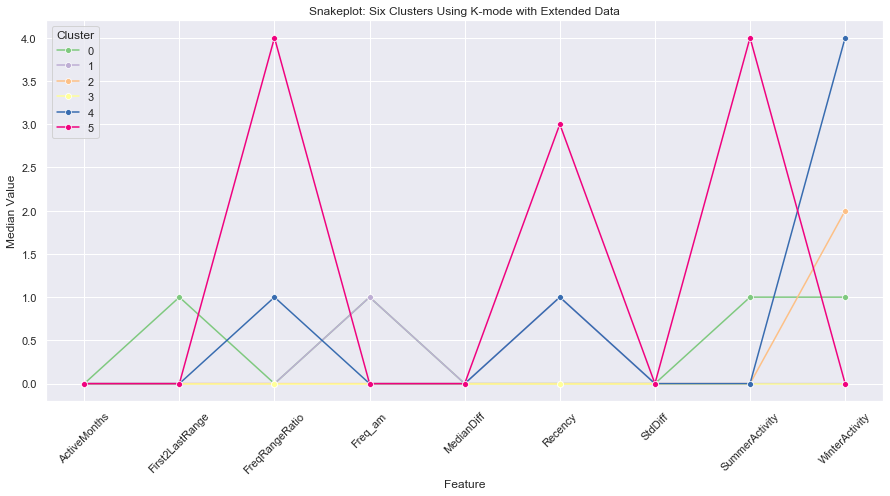

In [129]:
## visualization (Extended)
kmode_extend = df_categorical.groupby('clusters').median()
kmode_extend


kmode_extend_result = pd.melt(
    kmode_extend.reset_index(), 
    id_vars=['clusters'],
    value_vars=['Recency','Freq_am','ActiveMonths','StdDiff','MedianDiff','First2LastRange','FreqRangeRatio','WinterActivity','SummerActivity'], 
    var_name='Feature',
    value_name='Median Value'
)

plt.figure(figsize=(15, 7))
plt.xticks(rotation=45)
sns.set()
sns.lineplot(
    x="Feature",
    y="Median Value",
    hue='clusters',
    data=kmode_extend_result,
    palette="Accent",
    marker='o',
).set_title('Snakeplot: Six Clusters Using K-mode with Extended Data')
plt.legend([0,1,2,3,4,5], title = 'Cluster', loc = 'upper left')

In [130]:
df_categorical.groupby('clusters').count()

,Recency,Freq_am,ActiveMonths,StdDiff,MedianDiff,First2LastRange,FreqRangeRatio,WinterActivity,SummerActivity
clusters,,,,,,,,,
0,492230,492230,492230,492230,492230,492230,492230,492230,492230
1,565510,565510,565510,565510,565510,565510,565510,565510,565510
2,294848,294848,294848,294848,294848,294848,294848,294848,294848
3,354926,354926,354926,354926,354926,354926,354926,354926,354926
4,372492,372492,372492,372492,372492,372492,372492,372492,372492
5,158459,158459,158459,158459,158459,158459,158459,158459,158459


In [131]:
demo = pd.read_csv('donor_demographics.csv')
demo
demo['clusters'] = df_categorical['clusters']
demo =demo.dropna()

In [132]:
demo_label = demo.copy()
demo.dropna()
demo_label= demo_label.astype('category')
# le = preprocessing.LabelEncoder()
# demo_lebel = demo_label.apply(le.fit_transform)
demo['donor_yob'] = 2020 - demo['donor_yob']
demo['cluster'] = clusters
demo.groupby('clusters').mean()

,donor_num,don_gender,don_race,donor_yob,site_id,proportion_under_30_yo,prop_household_inc_less_50k,prop_college,medianincome,cluster
clusters,,,,,,,,,,
0.0,8.910848e+05,0.421510,2.741188,38.151817,111.373354,0.453053,0.594515,0.104338,41483.818540,0
1.0,1.084732e+06,0.426523,2.698826,37.220092,105.418972,0.450798,0.589692,0.100822,41964.262347,1
2.0,1.176063e+06,0.437395,2.696667,37.077820,106.413454,0.450770,0.590155,0.100489,41909.933254,2
3.0,1.214783e+06,0.428464,2.708677,36.789694,107.003243,0.451601,0.590096,0.101565,41893.817303,3
4.0,1.387716e+06,0.445738,2.720875,36.323696,103.293601,0.447508,0.584846,0.098797,42504.040355,4
5.0,1.000178e+06,0.433607,2.675922,37.127743,110.029787,0.452807,0.594536,0.104292,41427.782581,5


In [133]:
df_categorical.groupby('clusters').mean()

,Recency,Freq_am,ActiveMonths,StdDiff,MedianDiff,First2LastRange,FreqRangeRatio,WinterActivity,SummerActivity
clusters,,,,,,,,,
0,0.792447,1.510593,0.555289,0.018349,0.000154,1.427944,0.139094,1.158601,1.017285
1,1.700773,0.987314,0.014573,0.012856,0.000944,0.164153,0.492923,0.997961,1.041789
2,1.080377,0.745276,0.075242,0.040957,0.007485,0.510453,0.168002,2.023738,0.280863
3,1.553577,0.224576,0.002727,0.025076,0.003108,0.147580,1.128331,0.000000,1.133332
4,1.291722,0.431921,0.000040,0.014693,0.001828,0.064130,1.632859,4.000000,0.000000
5,2.380704,0.245332,0.000044,0.000555,0.000208,0.003357,2.697720,0.000915,3.610353


In [134]:
itphrt = merged[['Recency','Freq_am','ActiveMonths','StdDiff','MedianDiff','First2LastRange','FreqRangeRatio','WinterActivity','SummerActivity']]
itphrt['clusters'] = clusters

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
itphrt.groupby('clusters').mean()

,Recency,Freq_am,ActiveMonths,StdDiff,MedianDiff,First2LastRange,FreqRangeRatio,WinterActivity,SummerActivity
clusters,,,,,,,,,
0,582.404837,4.599883,17.828663,63.252027,5.142026,980.829265,0.105467,0.336403,0.290402
1,1116.845267,3.535399,4.056613,28.527113,4.849447,204.580296,0.200193,0.263502,0.276537
2,745.773707,3.213401,6.898873,66.915884,10.779631,458.220985,0.102037,0.509477,0.113892
3,1044.935581,2.147841,2.702758,36.205501,6.495168,154.798479,0.330684,0.022580,0.293886
4,870.866942,2.406094,1.831994,19.312296,4.111981,76.048522,0.450724,0.987939,0.001517
5,1469.957913,1.852900,1.378533,3.692003,1.695647,17.284578,0.687349,0.001456,0.899560


In [136]:
## cluster stability 
from sklearn.utils import resample
from tqdm import tqdm
def generate_cluster_stability(datascaled, boot):
    original_donors = set(df_filtered.index)
    bootstrap_donors = set(boot.index)
    
    og_bootstrap_intersect = original_donors.intersection(bootstrap_donors)
    
    max_jaccard_sim = []
    
    # for each cluster
    for i in range(6):
        
        # get the induced cluster
        induced_cluster = set(datascaled[datascaled.clusters == i].index).intersection(og_bootstrap_intersect)
        jaccard_sim = []
        
        # find the new cluster with max jaccard similarity
        for j in tqdm(range(6)):
            delta = set(boot[boot.clusters == j].index).intersection(og_bootstrap_intersect)
            jaccard_sim.append(len(induced_cluster.intersection(delta))/len(induced_cluster.union(delta)))
        max_jaccard_sim.append(max(jaccard_sim))
    return max_jaccard_sim
jaccard = pd.DataFrame()
for run in tqdm(range(10)):
    boot = resample(df_categorical.drop(columns = ['clusters']), replace=True, n_samples=len(df_categorical))
    
    model = KModes(n_clusters=6).fit(boot)
    boot['clusters'] = model.predict(boot)
    
    max_jaccard_sim = generate_cluster_stability(df_categorical, boot)
    jaccard['run_' + str(run)] = max_jaccard_sim
    
jaccard = jaccard.transpose()


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:00<00:03,  1.45it/s]

 33%|███▎      | 2/6 [00:00<00:02,  1.76it/s]

 50%|█████     | 3/6 [00:01<00:01,  2.33it/s]

 67%|██████▋   | 4/6 [00:01<00:00,  2.97it/s]

100%|██████████| 6/6 [00:01<00:00,  4.26it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:00<00:03,  1.35it/s]

 33%|███▎      | 2/6 [00:00<00:02,  1.69it/s]

 50%|█████     | 3/6 [00:01<00:01,  2.24it/s]

 67%|██████▋   | 4/6 [00:01<00:00,  2.85it/s]

100%|██████████| 6/6 [00:01<00:00,  4.17it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:00<00:03,  1.39it/s]

 33%|███▎      | 2/6 [00:00<00:02,  1.72it/s]

 67%|██████▋   | 4/6 [00:01<00:00,  2.29it/s]

100%|██████████| 6/6 [00:01<00:00,  4.39it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:00<00:04,  1.23it/s]

 33%|███▎      | 2/6 [00:01<00:02,  1.56it/s]

 50%|█████     | 3/6 [00:01<00:01,  2.08it/s]

 

100%|██████████| 6/6 [00:01<00:00,  4.29it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:00<00:03,  1.37it/s]

 33%|███▎      | 2/6 [00:01<00:02,  1.68it/s]

 67%|██████▋   | 4/6 [00:01<00:00,  2.25it/s]

100%|██████████| 6/6 [00:01<00:00,  4.26it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:00<00:03,  1.36it/s]

 33%|███▎      | 2/6 [00:00<00:02,  1.73it/s]

 67%|██████▋   | 4/6 [00:01<00:00,  2.31it/s]

100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

100%|██████████| 10/10 [1:15:09<00:00, 450.91s/it]


In [139]:
jaccard.to_csv('jaccard.csv')


In [142]:
jaccard.mean()

0    0.560217
1    0.194408
2    0.167625
3    0.252435
4    0.186305
5    0.100343
dtype: float64

In [140]:
# davies baldwin score
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df_categorical, clusters)


2.107022608135924

In [144]:
## scatter plot 
df_plot = df_filtered[['Recency','']]

,Recency,Freq_am,ActiveMonths,StdDiff,MedianDiff,First2LastRange,FreqRangeRatio,WinterActivity,SummerActivity,clusters
0,0.000391,0.571429,0.158537,0.002357,0.003150,0.158513,0.211202,0.465116,0.127907,2
1,0.824266,0.659259,0.170732,0.001763,0.003150,0.174168,0.232580,0.336538,0.221154,0
2,0.000783,0.600000,0.109756,0.004320,0.003150,0.119374,0.208527,0.390625,0.359375,0
3,0.743249,0.142857,0.073171,0.026079,0.002756,0.197260,0.030920,0.312500,0.562500,2
4,0.324070,0.595960,0.121951,0.076404,0.003150,0.562818,0.047895,0.314286,0.200000,1
...,...,...,...,...,...,...,...,...,...,...
2238460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4
2238461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4
2238462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4
2238463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4
